# Exploratory Data Analysis of SyriaTel Customer Churn Dataset

In this notebook, I will explore the customer churn dataset to understand the structure of the data, investigate patterns, and derive insights that will guide the preprocessing and modeling steps in later stages. 

They key objectives of this EDA include:
- Understanding the distribution of the target variable (`churn`).
- Investigating the relationships between features and churn.
- Identifying any missing data or outliers.
- Exploring potential features to include or exclude from the final model.

# Loading and Understanding the Dataset

I will begin by loading the data set and reviewing its structure. This includes checking the data types, looking for missing values, and getting a summary of numerical features. 

In [41]:
import pandas as pd

pd.set_option('display.max_columns', None)

data_path = '../data/raw/telecom_churn_dataset.csv'
df = pd.read_csv(data_path)

df

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [44]:
df.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

## Churn Distribution Chart

Plotting a Churn Distribution Chart to better visualize if any class imbalance in present. 

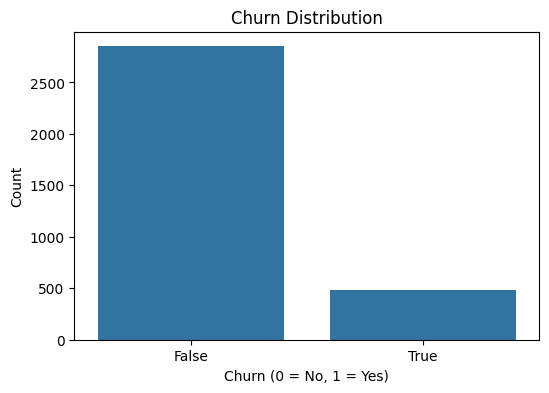

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

# plotting churn distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='churn', data=df)
plt.title('Churn Distribution')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

## Churn vs. Customer Service Calls

I wanted to look into how customer service call frequency correlates with churn, providing insights into risk factors.

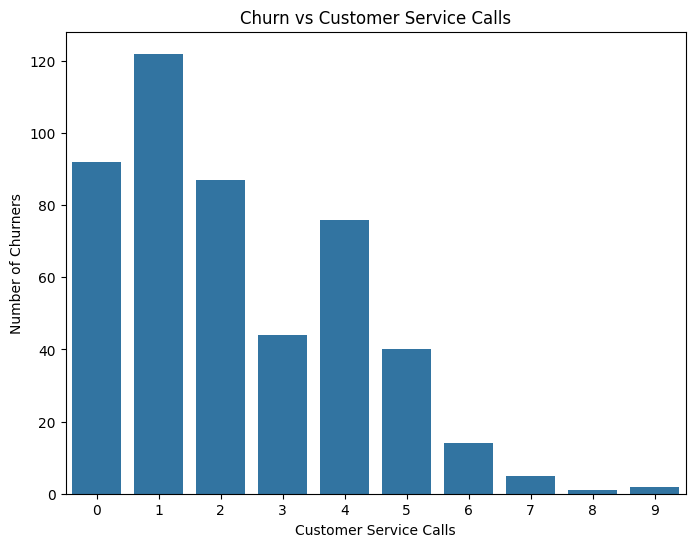

In [64]:
plt.figure(figsize=(8, 6))
sns.barplot(x='customer service calls', y='churn', data=df, estimator=sum, errorbar=None)
plt.title('Churn vs Customer Service Calls')
plt.ylabel('Number of Churners')
plt.xlabel('Customer Service Calls')
plt.show()

## Exploring Categorical Variables

I plan to investigate the categorical variables in the dataset, such as `international_plan` and `voice_mail_plan`, to understand their distributions and potential relationships with customer churn.

Currently, the `state` and `phone_number` columns are also included in the categorical variables. However, these columns are not relevant to predicting customer churn. Therefore, they will be excluded during the preprocessing phase, as they serve no meaningful purpose in modeling and might introduce noise into the dataset.

These features will later be encoded to numerical values during the preprocessing phase.

In [46]:
def get_uniques(df, columns):
    return {column: list(df[column].unique()) for column in columns}

In [47]:
def get_categorical_columns(df):
    return [column for column in df.columns if df.dtypes[column] == 'object']

In [48]:
get_uniques(df, get_categorical_columns(df))

{'state': ['KS',
  'OH',
  'NJ',
  'OK',
  'AL',
  'MA',
  'MO',
  'LA',
  'WV',
  'IN',
  'RI',
  'IA',
  'MT',
  'NY',
  'ID',
  'VT',
  'VA',
  'TX',
  'FL',
  'CO',
  'AZ',
  'SC',
  'NE',
  'WY',
  'HI',
  'IL',
  'NH',
  'GA',
  'AK',
  'MD',
  'AR',
  'WI',
  'OR',
  'MI',
  'DE',
  'UT',
  'CA',
  'MN',
  'SD',
  'NC',
  'WA',
  'NM',
  'NV',
  'DC',
  'KY',
  'ME',
  'MS',
  'TN',
  'PA',
  'CT',
  'ND'],
 'phone number': ['382-4657',
  '371-7191',
  '358-1921',
  '375-9999',
  '330-6626',
  '391-8027',
  '355-9993',
  '329-9001',
  '335-4719',
  '330-8173',
  '329-6603',
  '344-9403',
  '363-1107',
  '394-8006',
  '366-9238',
  '351-7269',
  '350-8884',
  '386-2923',
  '356-2992',
  '373-2782',
  '396-5800',
  '393-7984',
  '358-1958',
  '350-2565',
  '343-4696',
  '331-3698',
  '357-3817',
  '418-6412',
  '353-2630',
  '410-7789',
  '416-8428',
  '370-3359',
  '383-1121',
  '360-1596',
  '395-2854',
  '362-1407',
  '341-9764',
  '353-3305',
  '402-1381',
  '332-9891',
  '372

In [53]:
# list of categorical columns
categorical_columns = ['international plan', 'voice mail plan', 'churn']

# verifying the unique values in each categorical variable
for column in categorical_columns:
    print(f'{column}:\n', df[column].value_counts(), '\n')

international plan:
 international plan
no     3010
yes     323
Name: count, dtype: int64 

voice mail plan:
 voice mail plan
no     2411
yes     922
Name: count, dtype: int64 

churn:
 churn
False    2850
True      483
Name: count, dtype: int64 



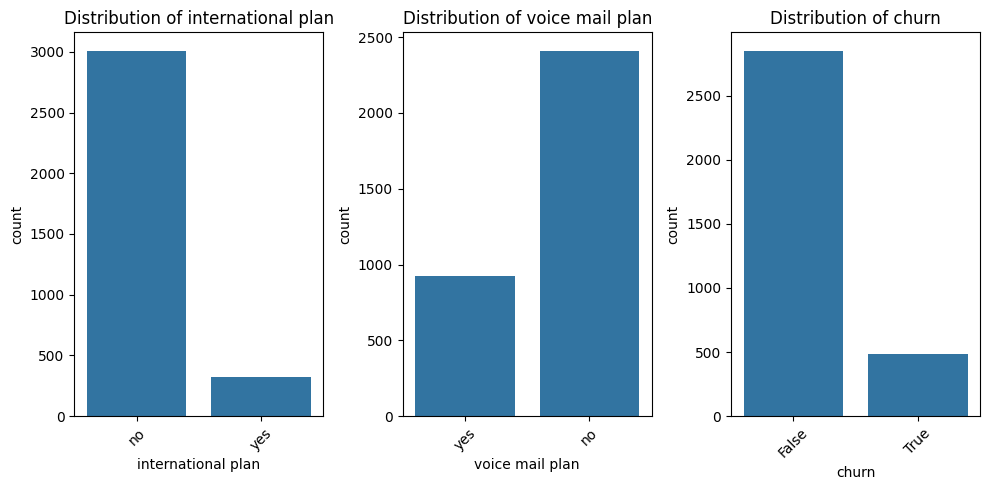

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

# plotting bar charts for each categorical variable
plt.figure(figsize=(10, 5))

for i, column in enumerate(categorical_columns, 1):
    plt.subplot(1, 3, i)
    sns.countplot(x=df[column])
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

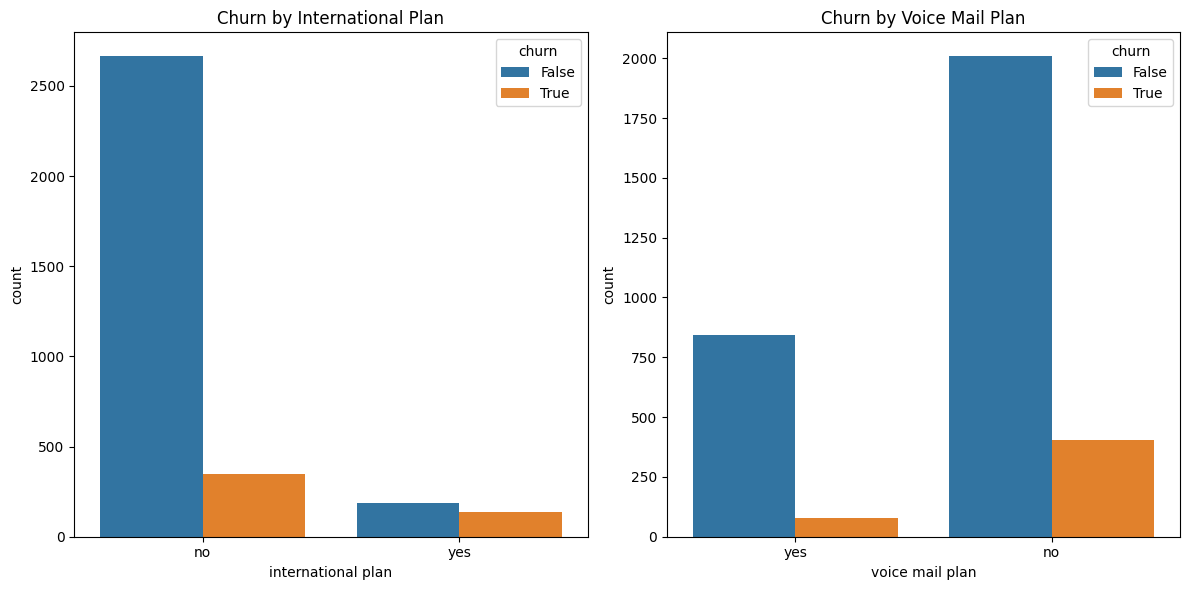

In [56]:
# plotting distribution of churn across international_plan and voice_mail_plan
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.countplot(x='international plan', hue='churn', data=df)
plt.title('Churn by International Plan')

plt.subplot(1, 2, 2)
sns.countplot(x='voice mail plan', hue='churn', data=df)
plt.title('Churn by Voice Mail Plan')

plt.tight_layout()
plt.show()

In [58]:
# churn rate by international_plan
churn_rate_international = df.groupby('international plan')['churn'].mean()
print('Churn Rate by International Plan:\n', churn_rate_international)

# churn rate by voice_mail_plan
churn_rate_voicemail = df.groupby('voice mail plan')['churn'].mean()
print('Churn Rate by Voice Mail Plan:\n', churn_rate_voicemail)

Churn Rate by International Plan:
 international plan
no     0.114950
yes    0.424149
Name: churn, dtype: float64
Churn Rate by Voice Mail Plan:
 voice mail plan
no     0.167151
yes    0.086768
Name: churn, dtype: float64


### Summary of Exploring Categorical Variables

#### Churn Rate by Categorical Variables

I calculated the churn rate for customers based on whether they have an international plan or a voice mail plan.

#### Churn Rate by International Plan:
- **Customers without an international plan**: 11.5% churn rate.
- **Customers with an international plan**: 42.4% churn rate.
  
Having an international plan is associated with a significantly higher churn rate. This could indicate that customers with international plans are more likely to leave, possibly due to unmet expectations or service issues.

#### Churn Rate by Voice Mail Plan:
- **Customers without a voice mail plan**: 16.7% churn rate.
- **Customers with a voice mail plan**: 8.7% churn rate.
  
Having a voice mail plan appears to reduce the likelihood of churn, suggesting that this feature may play a positive role in retaining customers.

## Exploring Numerical Features

Here, we explore the numerical features (e.g., `total_day_minutes`, `customer_service_calls`) to understand their distributions and check for any potential outliers or patterns. We also analyze correlations between these features and the target variable (`churn`).

In [49]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


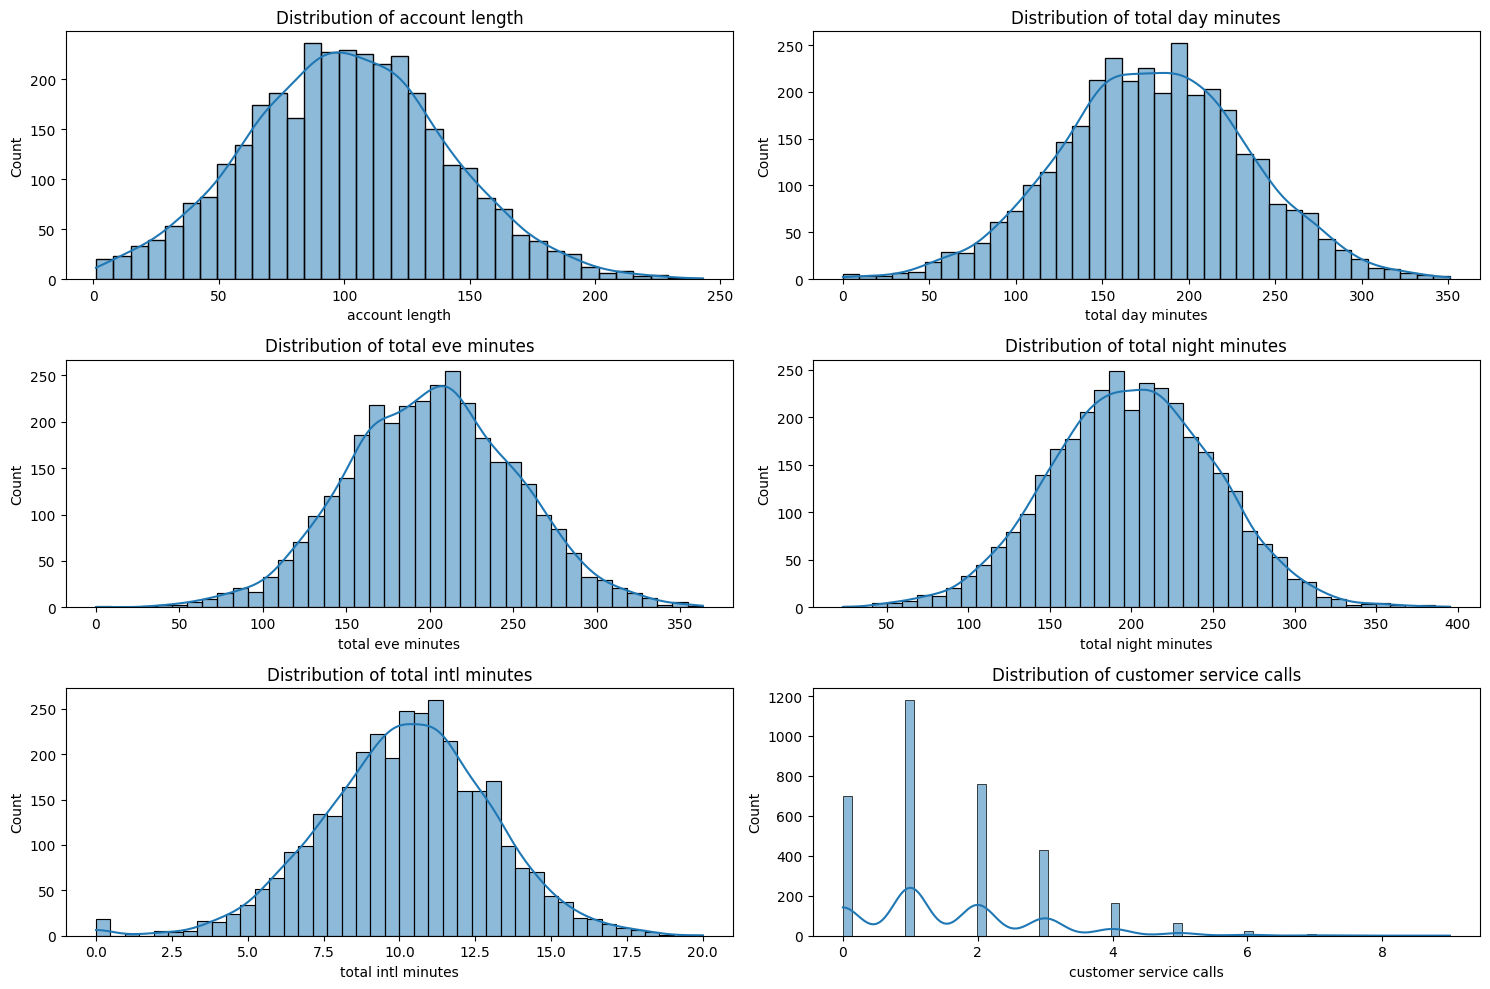

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_columns = ['account length', 'total day minutes', 'total eve minutes', 
                     'total night minutes', 'total intl minutes', 'customer service calls']

plt.figure(figsize=(15, 10))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 2, i)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    
plt.tight_layout()
plt.show()

### Summary Statistics of Numerical Features

The table below summarizes the distribution of numerical features in the dataset. It provides key metrics such as mean, standard deviation, and percentiles.

#### Key Observations:
- **Account Length**: The average customer has an account length of approximately 101 days, with a standard deviation of 40 days. The maximum account length is 243 days, and the minimum is 1 day.
- **Total Day, Evening, and Night Minutes**: Customers tend to use a similar amount of minutes during the day, evening, and night, with means of around 180-200 minutes in each category. However, there are outliers, as seen from the maximum values.
- **Total International Minutes**: The average usage of international minutes is low, at around 10 minutes, with a maximum of 20 minutes.
- **Customer Service Calls**: Most customers make an average of 1-2 customer service calls, though some outliers have made up to 9 calls. This feature may be interesting to explore further as it could be related to customer churn.

I will use this information to identify potential outliers, scale the data if necessary, and select relevant features for modeling.

## Correlation Analysis

In this section, I compute the correlation matrix to investigate the relationships between the numerical features and the target variable (`churn`). This will help me identify which features are strongly correlated with churn, guiding the feature selection for modeling.

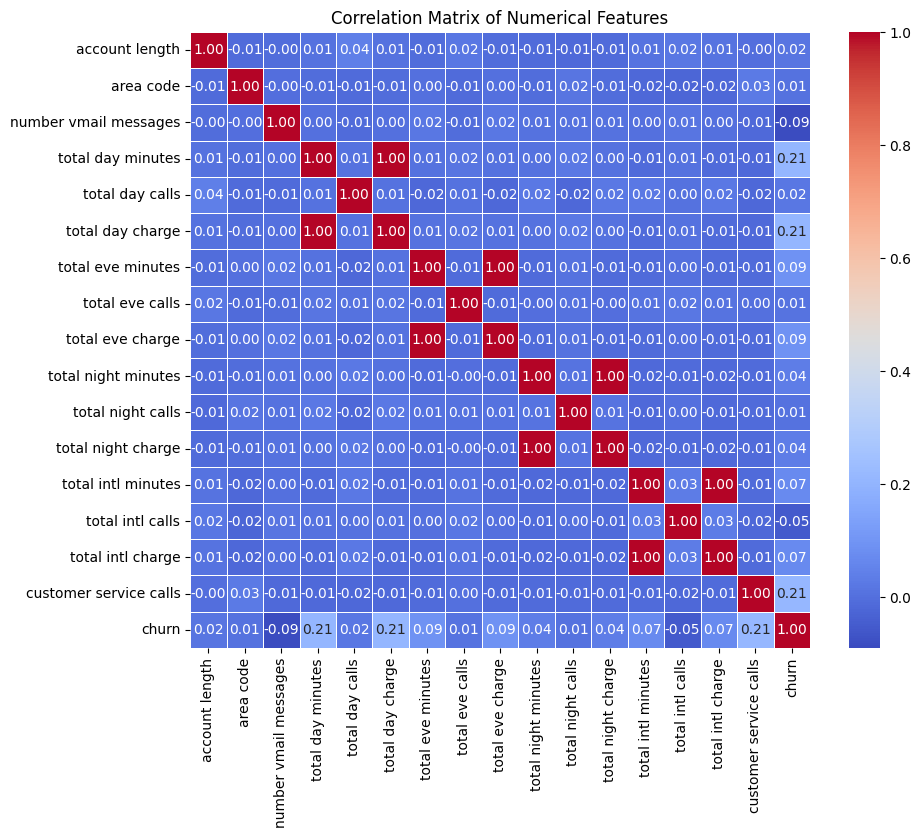

In [60]:
# temp selecting only numerical columns without modifying the original DataFrame
numeric_df = df.select_dtypes(include=['float64', 'int64', 'bool']).copy()

# converting boolean columns to integers, without affecting the original DataFrame
numeric_df['churn'] = numeric_df['churn'].astype(int)
corr_matrix = numeric_df.corr()

# plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

### Correlation Matrix Summary

- **Perfect Correlation**: Features like `total_day_minutes` and `total_day_charge` (and similar pairs) are perfectly correlated. I may drop one feature from each pair to avoid multicollinearity.
- **Customer Service Calls**: This feature shows a moderate positive correlation with churn (0.21), indicating that customers who make more service calls are more likely to churn.
- **Other Features**: Most features show weak correlations with churn, suggesting that they may not be strong individual predictors but could still contribute when combined with other features in the model.

**Note**: Churn was temporarily encoded as 1 (True) and 0 (False) for this correlation analysis.

# Insights and Conclusions

## 1. Class Imbalance:
- The dataset shows a **class imbalance** with only **14.5% of customers churning** and **85.5% not churning**. This imbalance may require resampling techniques or special consideration in the model to avoid bias towards the majority class.

## 2. Categorical Features:
- **International Plan**: Customers with an international plan have a significantly higher churn rate (**42.4%**) compared to those without one (**11.5%**). This suggests that having an international plan may be a strong indicator of customer dissatisfaction or unmet expectations, making it a key feature for predicting churn.
- **Voice Mail Plan**: Customers without a voice mail plan have a higher churn rate (**16.7%**) compared to those with one (**8.7%**). This implies that offering voice mail plans may help retain customers, and this feature is likely to be important for the prediction model.

## 3. Numerical Features:
- **Customer Service Calls**: This feature has a positive correlation with churn (**0.21**). Customers who make more service calls are more likely to churn, suggesting that frequent interaction with customer service could be a sign of dissatisfaction.
- **Highly Correlated Features**: Several pairs of features (e.g., `total_day_minutes` and `total_day_charge`) are perfectly correlated. These pairs essentially represent the same information, so I may consider dropping one feature from each pair during the preprocessing phase to avoid multicollinearity.

## 4. General Distribution Patterns:
- Most numerical features (e.g., `total_day_minutes`, `total_eve_minutes`) follow a normal distribution, while **customer service calls** has a more skewed distribution, with many customers having zero or very few calls but a few customers making frequent calls.
- **Weak Correlations with Churn**: Most features have weak correlations with churn, indicating that no single feature strongly predicts churn on its own. However, combinations of features may still provide valuable information for churn prediction.

## Conclusion:
The EDA revealed key insights that will guide the next steps of the project:
- **International Plan** and **Voice Mail Plan** are important categorical features related to churn, with clear differences in churn rates between their respective groups.
- **Customer Service Calls** has a meaningful relationship with churn and should be considered as a crucial feature for the prediction model.
- To handle multicollinearity, I will likely remove one feature from highly correlated pairs like `total_day_minutes` and `total_day_charge`.
- Addressing class imbalance will be important during model building to ensure I accurately predict churners despite the skewed distribution of the target variable.

The next steps will involve preprocessing the data, encoding categorical variables, addressing class imbalance, and selecting features for the churn prediction model.